# Martin-Synge algorithm


Marek Szymanski

In [1]:
import scipy.integrate
import numpy as np
from sparsegrad.base import *
from sparsegrad.forward import nvalue, seed

In [2]:
from collections import namedtuple
params_type = namedtuple('params_type', ['c0', 'F', 'a', 'b', 'L', 'u'])

In [3]:
def f_langmuir(c, params):
    return params.a*c/(1.+params.b*c)
def dfdc_langmuir(c, params):
    return params.a/(params.b*c + 1)**2

In [4]:
def ode(t, x, params):
    c = stack(params.c0, x)
    N = len(nvalue(x)) + 1
    dz = params.L / (N-1)
    deriv_z = (c[1:]-c[:-1])/dz
    # dq/dt = dq/dc*dc/dt assuming const params
    return -params.u*deriv_z / (1.+params.F*dfdc_langmuir(x, params))

In [5]:
params_table = params_type(L=1e-2, 
                           u=1e-2/60, 
                           F=100/60/0.4, # k/epsilon
                           c0=1e-3/1e-3, # cinj
                           a=1, 
                           #b=0.1e-3/1e-3,
                           b=0)

In [6]:
N = 100
x0 = np.zeros(N)
def jac(t, x):
    return ode(t, seed(x), params_table).dvalue.tocsr()
def func(t, x):
    return ode(t, x,params_table)
result = scipy.integrate.solve_ivp(func, [0, 8*60], x0, method='Radau', jac=jac, rtol=1e-6, atol=1e-8)

In [7]:
%matplotlib inline
import matplotlib.pylab as plt

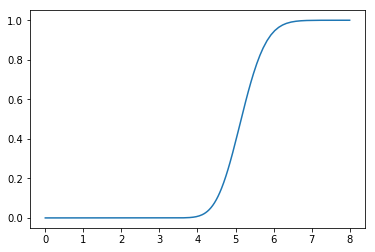

In [8]:
plt.plot(result.t/60, result.y[-1,:])

In [9]:
import ipywidgets

def plot(i=ipywidgets.IntSlider(min=0,max=len(result.t)-1)):
    print('time = ', result.t[i])
    plt.plot(result.y[:N-2,i])
    plt.show()

ipywidgets.interact(plot)

interactive(children=(IntSlider(value=0, description='i', max=261), Output()), _dom_classes=('widget-interact'…

<function __main__.plot(i=IntSlider(value=0, description='i', max=261))>